In [17]:
## 20.440 - Project code
## Project name: Finding Urine Metabolomic Cues Between Different Blue Crab Diets Using Mass Spectrometry Data
## Team Member: Huaiyao Peng, Yichen Xiang

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import seaborn as sns

## Check version
!python --version
print('numpy version:', np.version.version)
print('Panda version:',pd.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version', sns.__version__)

## Connect to google dirve
drive.mount('/content/drive')

## Import MS data of both positive mode and nagative mode as panda format:
crabp=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Uploaded Feature List_CrabUrine_pos_V2.txt',sep='\t')
#print(crabp)
crabn=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Uploaded Feature List_CrabUrine_neg_V2.txt',sep='\t')
#print(crabn)

Python 3.10.11
numpy version: 1.22.4
Panda version: 1.5.3
matplotlib version: 3.7.1
seaborn version 0.12.2
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [8]:
## Filter and collect the annotated chemicals ##
##
known_p=crabp.dropna(subset=["Formula"]) 
known_n=crabn.dropna(subset=["Formula"]) 
knowp = known_p.loc[known_p['Name'].str.contains("_")]
#print(known_p)
known = known_n.loc[known_n['Name'].str.contains("_")]
Name_chemicals=known_p.drop(knowp.index)
#print(Name_chemicals)
Name_chemicals_n=known_n.drop(known.index)
crab_chemical=Name_chemicals.dropna(axis=1)
#print(crab_chemical)
crab_chemical_n=Name_chemicals_n.dropna(axis=1)
pos_list= crab_chemical.groupby('Name')['MA',"MB","MD","OA","OC","OD"].transform('sum')
#print(pos_list)
neg_list= crab_chemical_n.groupby('Name')['MA',"MB","MD","OA","OC","OD"].transform('sum')
#print(neg_list)
new_list=pos_list.sort_values(by="MA",ascending=False).drop_duplicates()
new_list_n=neg_list.sort_values(by="MA",ascending=False).drop_duplicates()
final_n=crab_chemical.loc[new_list.index].sort_values(by="MA",ascending=False)
#print(final_n)
final_neg=crab_chemical_n.loc[new_list_n.index].sort_values(by="MA",ascending=False)
#print(final_neg)
##
## Filter and collect the annotated chemicals ##

<ipython-input-8-af0035be7da0>:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pos_list= crab_chemical.groupby('Name')['MA',"MB","MD","OA","OC","OD"].transform('sum')
<ipython-input-8-af0035be7da0>:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  neg_list= crab_chemical_n.groupby('Name')['MA',"MB","MD","OA","OC","OD"].transform('sum')


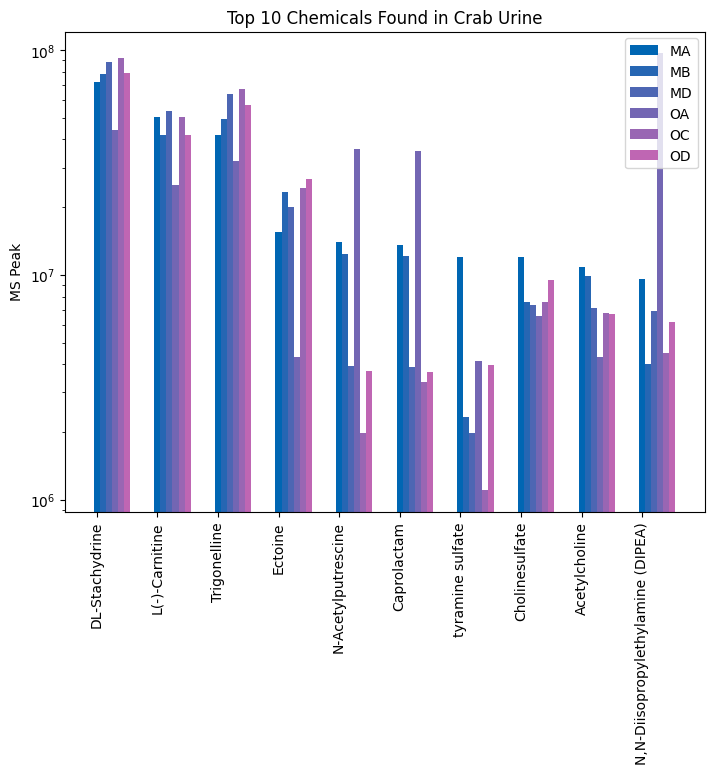

<Figure size 640x480 with 0 Axes>

In [13]:
## Plot top 10 chemicals from positive mode
## 
X = np.arange(10)
final_n.reset_index

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ploty=[]
ploty=pd.DataFrame(ploty)
ploty[0]=final_n['MA']
ploty[1]=final_n['MB']
ploty[2]=final_n['MD']
ploty[3]=final_n['OA']
ploty[4]=final_n['OC']
ploty[5]=final_n['OD']
ploty[6]=final_n['Name']
for i in range(6):
  ax.bar(X + 0.1*i, ploty[i][0:10], color=(0.15*i, 0.4, 0.7, 1), width = 0.1,label=final_n.columns[i+8])
  ax.legend()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_yscale('log')
ax.set_xticklabels(ploty[6][0:10],rotation=90)
ax.set_ylabel("MS Peak")
plt.title("Top 10 Chemicals Found in Crab Urine")
plt.show()
plt.savefig('Top10Chemicals_positive.png')

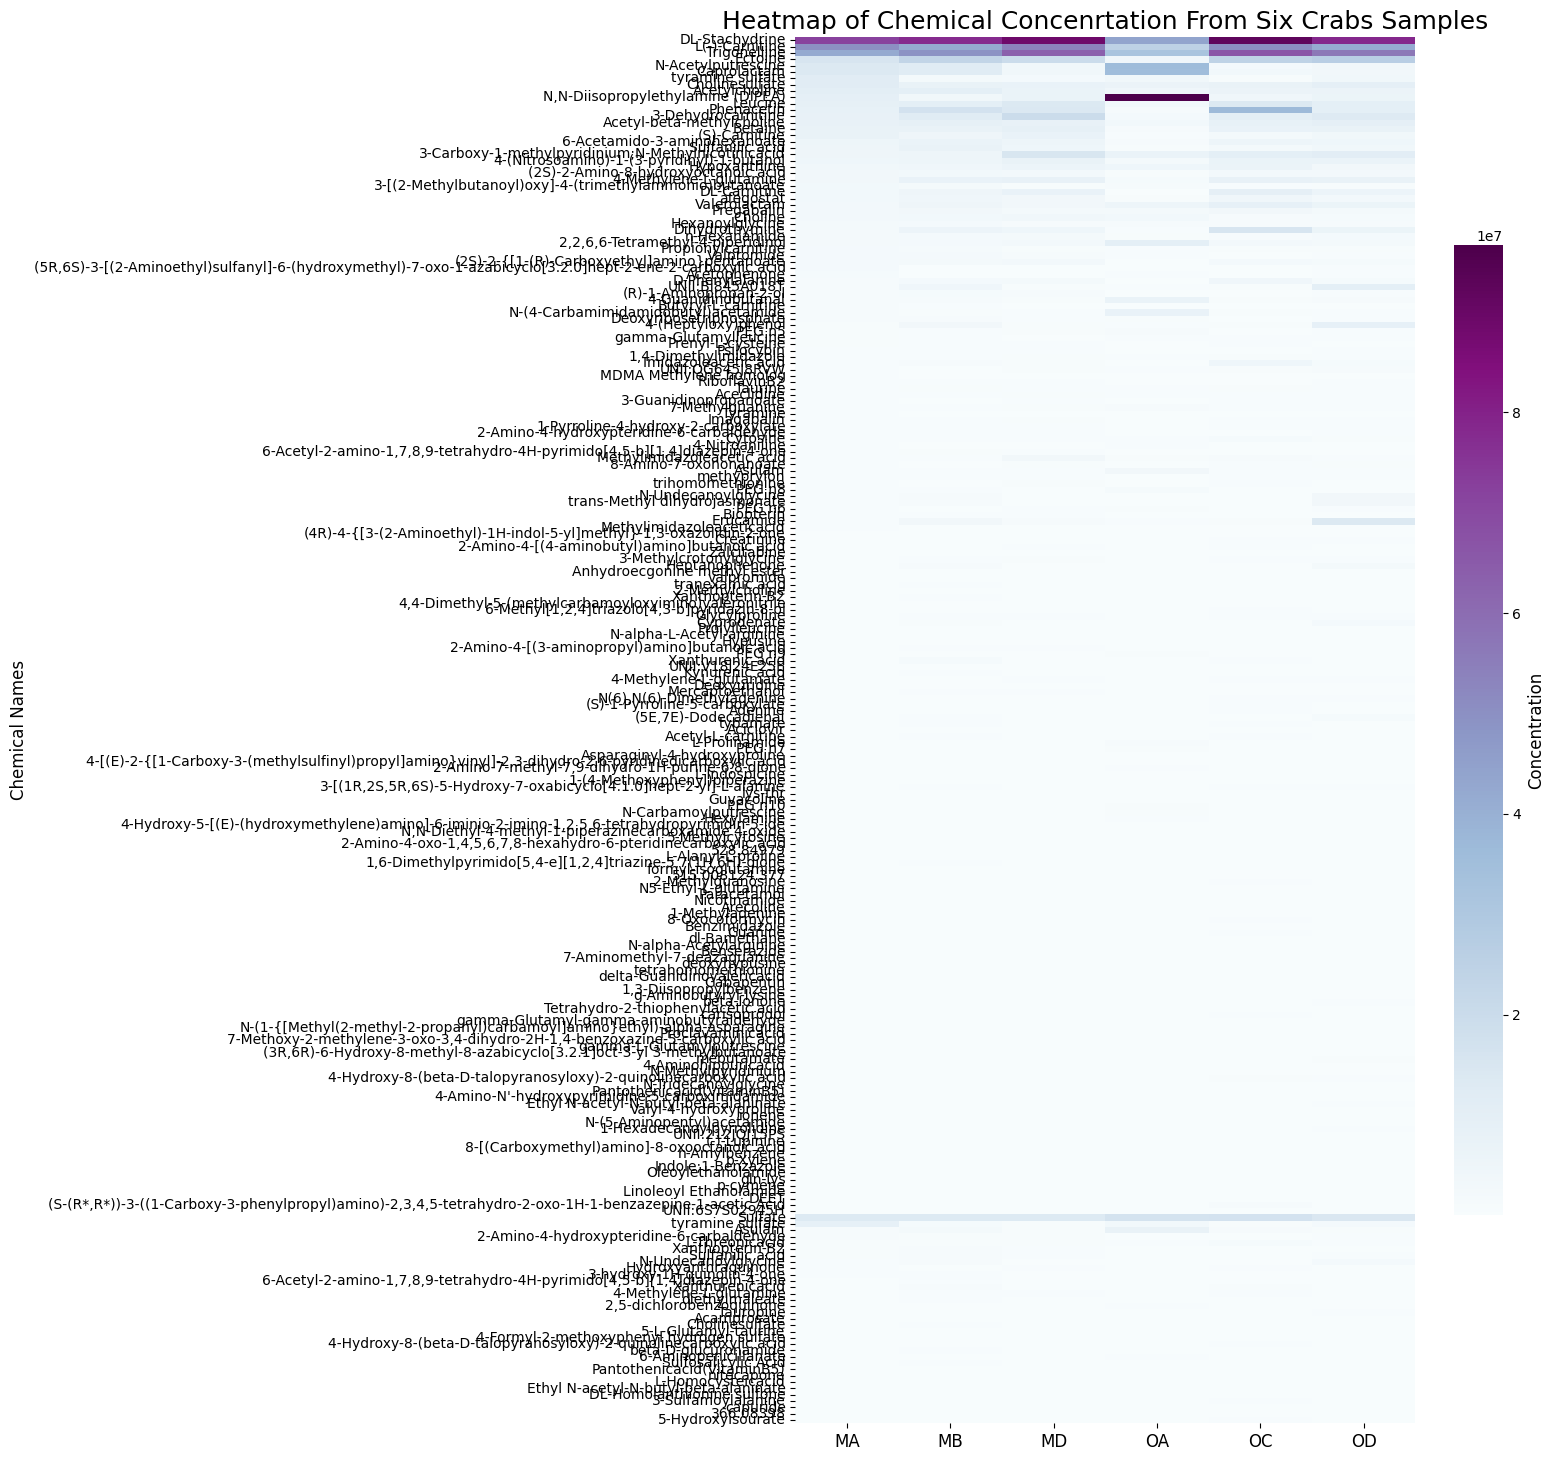

In [18]:
## Combine the both postive mode and negative mode chemicals
%matplotlib inline
Positive = pd.DataFrame()
Negative = pd.DataFrame()
Positive['Name'] = final_n['Name']
Positive['MA'] = final_n['MA']
Positive['MB'] = final_n['MB']
Positive['MD'] = final_n['MD']
Positive['OA'] = final_n['OA']
Positive['OC'] = final_n['OC']
Positive['OD'] = final_n['OD']

Negative['Name'] = final_neg['Name']
Negative['MA'] = final_neg['MA']
Negative['MB'] = final_neg['MB']
Negative['MD'] = final_neg['MD']
Negative['OA'] = final_neg['OA']
Negative['OC'] = final_neg['OC']
Negative['OD'] = final_neg['OD']

zipping = [Positive, Negative]
all_chemical = pd.concat(zipping)
all_chemical = all_chemical.set_index('Name')
# all_chemical = all_chemical.reset_index(drop=True)
# all_chemical.pivot(index='Name',columns=['MA','MB','MD','OA','OC','OD'])
# print(all_chemical)

## Plot heatmap of all chemicals 
plt.figure(figsize=(10, 18))
#sns.set(font_scale=0.4)
ax = sns.heatmap(all_chemical, cmap='BuPu', annot=False, cbar_kws={"shrink": 0.7}, yticklabels=True)
ax.set_xticklabels(labels=['MA','MB','MD','OA','OC','OD'],fontsize=12)
ax.figure.axes[-1].set_ylabel('Concentration', size=12)
ax.figure.axes[0].set_ylabel('Chemical Names', size=12)
plt.title("Heatmap of Chemical Concenrtation From Six Crabs Samples",fontsize=18)
plt.show()

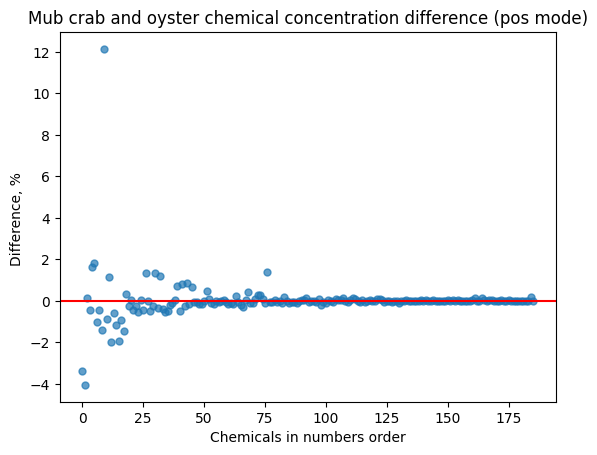

In [21]:
## Plot Mub crab and oyster chemical concentration difference ONLY FOR POSITIVE MODE
## This just for checking ##
MudCrab = pd.DataFrame()
MudCrab['MA']=final_n['MA']
MudCrab['MB']=final_n['MB']
MudCrab['MD']=final_n['MD']
MudCrab['mean'] = MudCrab.mean(axis=1)
#print(MudCrab)

Oyster = pd.DataFrame()
Oyster['OA']=final_n['OA']
Oyster['OC']=final_n['OC']
Oyster['OD']=final_n['OD']
Oyster['mean'] = Oyster.mean(axis=1)
#print(Oyster)

MO_diff = pd.DataFrame()
MO_diff['Name']=final_n['Name']
MO_diff['MudCrab']=MudCrab['mean']
MO_diff['Oyster']=Oyster['mean']
O_mean = MO_diff.loc[:, 'Oyster'].mean()
#MO_diff['Difference%']=(MO_diff['Oyster']-MO_diff['MudCrab'])/O_mean
MO_diff['Difference%']=(MO_diff['Oyster']-MO_diff['MudCrab'])/O_mean
MO_diff = MO_diff.reset_index(drop=True)
#print(MO_diff)
MO_diff.to_csv('Mub crab and oyster difference(pos).csv')

MO_diff['Difference%'].plot(style='.',ms=10,alpha=0.7)
plt.title("Mub crab and oyster chemical concentration difference (pos mode)")
plt.xlabel("Chemicals in numbers order")
plt.ylabel("Difference, % ")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()
## This just for checking ##

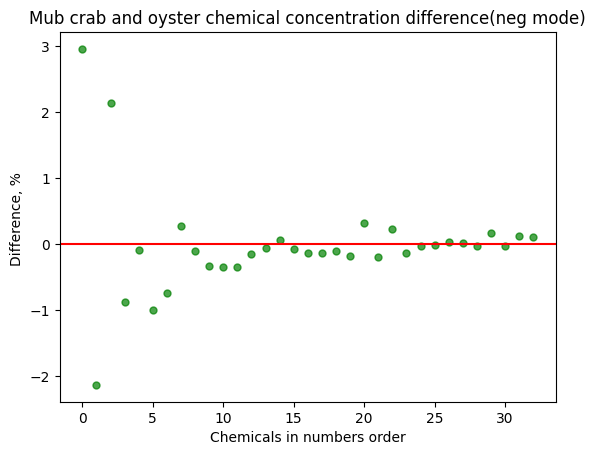

In [22]:
## Plot Mub crab and oyster chemical concentration difference ONLY FOR NEGATIVE MODE
## This just for checking ##
MudCrab_n = pd.DataFrame()
MudCrab_n['MA']=final_neg['MA']
MudCrab_n['MB']=final_neg['MB']
MudCrab_n['MD']=final_neg['MD']
MudCrab_n['mean'] = MudCrab_n.mean(axis=1)
#print(MudCrab)

Oyster_n = pd.DataFrame()
Oyster_n['OA']=final_neg['OA']
Oyster_n['OC']=final_neg['OC']
Oyster_n['OD']=final_neg['OD']
Oyster_n['mean'] = Oyster_n.mean(axis=1)
#print(Oyster)

MO_diff_n = pd.DataFrame()
MO_diff_n['Name']=final_neg['Name']
MO_diff_n['MudCrab']=MudCrab_n['mean']
MO_diff_n['Oyster']=Oyster_n['mean']
O_mean_n = MO_diff_n.loc[:, 'Oyster'].mean()
MO_diff_n['Difference%']=(MO_diff_n['Oyster']-MO_diff_n['MudCrab'])/O_mean_n
MO_diff_n = MO_diff_n.reset_index(drop=True)
# print(MO_diff_n)
MO_diff_n.to_csv('Mub crab and oyster difference(neg).csv')

MO_diff_n['Difference%'].plot(style='g.',ms=10,alpha=0.7)
plt.title("Mub crab and oyster chemical concentration difference(neg mode)")
plt.xlabel("Chemicals in numbers order")
plt.ylabel("Difference, % ")
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.show()
## This just for checking ##

In [24]:
## Combine both nagtive and postive concentration difference 
frames = [MO_diff, MO_diff_n]
result = pd.concat(frames)
result = result.reset_index(drop=True)
result['Fold Increase'] = result['MudCrab']/result['Oyster']
#print(result)
result.to_csv('Mub crab and oyster difference(all).csv')

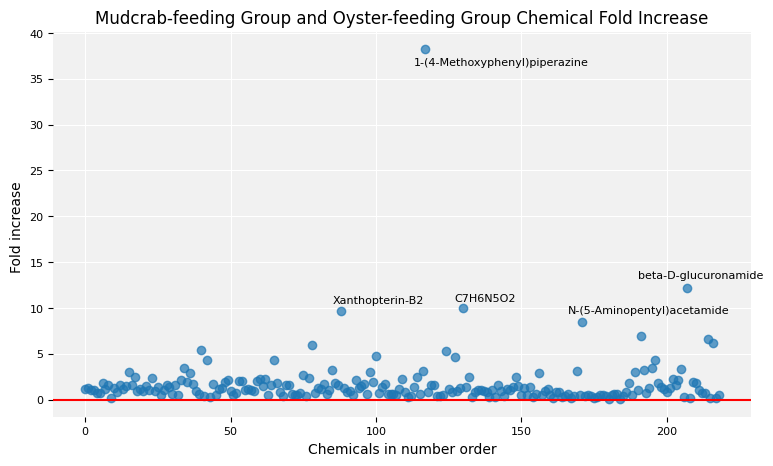

In [25]:
## Plot the fold change figure for all chemicals
plt.figure(figsize=(9, 5))
ax1 = result['Fold Increase'].plot(style='.',ms=12,alpha=0.7)
ax1.set_facecolor('gainsboro')
ax1.patch.set_alpha(0.4)
ax1.tick_params(labelsize=8)
plt.title("Mudcrab-feeding Group and Oyster-feeding Group Chemical Fold Increase",fontsize=12)
plt.xlabel("Chemicals in number order",fontsize=10)
plt.ylabel("Fold increase ",fontsize=10)
plt.axhline(y = 0, color = 'r', linestyle = '-')
ax1.grid(color='w', linestyle='solid')
sns.despine(left=True,bottom=True)

plt.text(127,10.7,'C7H6N5O2',fontsize=8)
plt.text(85,10.5,'Xanthopterin-B2',fontsize=8)
plt.text(113,36.5,'1-(4-Methoxyphenyl)piperazine',fontsize=8)
plt.text(190,13.2,'beta-D-glucuronamide',fontsize=8)
plt.text(166,9.4,'N-(5-Aminopentyl)acetamide',fontsize=8)
# plt.text(187,-3,'Tyramine sulfate',fontsize=10)
plt.show()

In [28]:
## Rank and save concentration differenece results
result['abs()']=abs(result['Difference%'])
result_new=result.sort_values(by=['abs()'],ascending=False)
result_new = result_new.reset_index(drop=True)
#print(result_new)
result_new.to_csv('Mub crab and oyster difference(ranked).csv')

In [29]:
## Rank and save fold increase results
result_fold=result_new.sort_values(by=['Fold Increase'],ascending=False)
result_fold.drop(columns=['Difference%'])
result_fold = result_fold.reset_index(drop=True)
#print(result_fold)
result_fold.to_csv('Mub crab and oyster fold increase(ranked).csv')

In [34]:
## Calculate p-value
from scipy.stats import ttest_ind
ttest_ind(result_fold['MudCrab'],result_fold['Oyster'])

Ttest_indResult(statistic=-0.020720932152275533, pvalue=0.9834777503491657)